In [ ]:
# 문제 정의 : 의료서비스 밀집 지역과 아닌 지역을 도출해 의료 시설이 충분히 제공되고 있는지 확인하고자 합니다.
# 예상 결과 : 전라도와 강원도 지역이 인프라 밀집도가 낮아 의료 수요가 부족할 것으로 예상됩니다.

In [ ]:
# 데이터 선택 : 전국 병원정보 데이터

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


# csv 파일을 로드합니다.
hospital_data = pd.read_csv("1.병원정보서비스 2024.3.csv")

# 데이터 구조를 확인합니다.
print(hospital_data.head())
print(hospital_data.info())


                                             암호화요양기호          요양기관명  종별코드  \
0  JDQ4MTYyMiM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...  가톨릭대학교 성빈센트병원     1   
1  JDQ4MTYyMiM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...   가톨릭대학교인천성모병원     1   
2  JDQ4MTYyMiM1MSMkMSMkNCMkODkkMzgxMzUxIzExIyQxIy...         강릉아산병원     1   
3  JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...         강북삼성병원     1   
4  JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...        건국대학교병원     1   

  종별코드명    시도코드 시도코드명   시군구코드 시군구코드명  읍면동   우편번호  ... 치과인턴 인원수 치과레지던트 인원수  \
0  상급종합  310000    경기  310603  수원팔달구   지동  16247  ...        0          0   
1  상급종합  220000    인천  220003  인천부평구  부평동  21431  ...        0          0   
2  상급종합  320000    강원  320100    강릉시  사천면  25440  ...        0          0   
3  상급종합  110000    서울  110016    종로구   평동  03181  ...        0          0   
4  상급종합  110000    서울  110023    광진구  화양동  05030  ...        0          0   

  치과전문의 인원수 한방일반의 인원수  한방인턴 인원수  한방레지던트 인원수  한방전문의 인원수  조산사 인원수       좌표(X

In [26]:
# 클러스터링에 사용할 변수를 선택합니다.
X = hospital_data[['시도코드', '시군구코드']]

In [27]:
# 데이터 샘플링 / 데이터가 커서 원하는 샘플만큼만 학습합니다.
sample_size = 10000  # 원하는 샘플 크기
hospital_data = hospital_data.sample(n=sample_size, random_state=42)

In [28]:
# 데이터 정규화를 합니다.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(hospital_data[['시도코드', '시군구코드']])

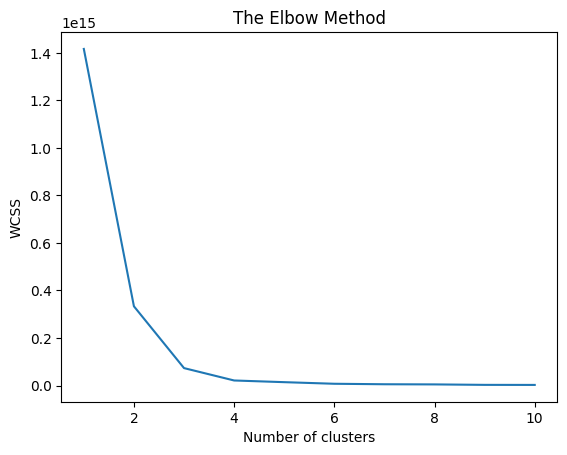

In [29]:
# 엘보우 방법으로 최적의 클러스터 수 결정합니다.
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# WCSS 그래프로 나타냅니다.
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [30]:
# 결정된 K 값으로 K-means 알고리즘을 초기화하고 클러스터링 수행합니다.
k = 10  # 클러스터 수 결정
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [31]:
# 각 클러스터의 중심점 분석합니다.
centroids = kmeans.cluster_centers_
print("클러스터 중심점:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i+1} Center: {centroid[0]}, {centroid[1]}")


클러스터 중심점:
Cluster 1 Center: 311012.5212552147, 312200.43896532437
Cluster 2 Center: 110000.0000000151, 110011.60005283065
Cluster 3 Center: 245008.62068965554, 245011.61982758582
Cluster 4 Center: 365634.8810118094, 365975.5285405196
Cluster 5 Center: 214032.13630971077, 214042.0214601503
Cluster 6 Center: 340923.73521267937, 341175.1595771428
Cluster 7 Center: 409999.99999999994, 409999.9999999985
Cluster 8 Center: 381976.69977081125, 382436.7448433889
Cluster 9 Center: 259999.99999999983, 260016.33917309027
Cluster 10 Center: 229999.9999999981, 230012.90393968677


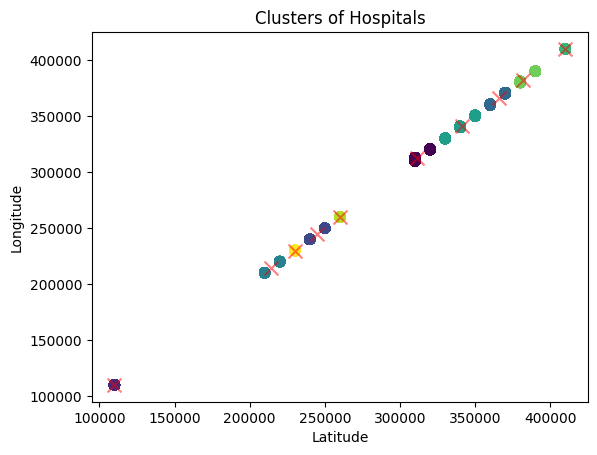

In [32]:
# 클러스터 시각화
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker='x', c='red', s=100, alpha=0.5)
plt.title('Clusters of Hospitals')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [33]:
# 평가: 실루엣 점수 계산
# 실루엣 점수는 0.8로 클러스터가 잘 정의되고 분리되어 있는 것으로 생각됩니다.
silhouette_avg = silhouette_score(X, y_kmeans)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.8161526238539296
